In [6]:
import os
from PIL import Image, ImageOps
import numpy as np

In [2]:
from license_plate_recognition.segmentation.service import SegmentationService

segmentation_service = SegmentationService()

In [3]:
def segment_directory(directory: str):
    result = []
    for file in os.listdir(directory):
        file_path = os.path.join(directory, file)
        pillow_image = Image.open(file_path)
        image = np.array(pillow_image)

        characters = segmentation_service.segment(image)

        for character in characters:
            character_image = Image.fromarray(character)
            result.append(character_image)
    
    return result

In [6]:
# Works on dataset with Polish license plates
# Bounding boxes taken from the dateset are used here (not whole images)
# https://www.kaggle.com/datasets/piotrstefaskiue/poland-vehicle-license-plate-dataset
train_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "plates", "train")
segmented_characters = segment_directory(train_directory)

results_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "train")
for index, character in enumerate(segmented_characters):
    character.save(os.path.join(results_directory, f"{index + 1}.png"))


In [12]:
# create directories to sort the segmented characters
sorted_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "train-sorted")

if not os.path.exists(sorted_directory):
    os.mkdir(sorted_directory)
    
for i in range(10):
    directory = os.path.join(sorted_directory, str(i))
    if not os.path.exists(directory):
        os.mkdir(directory)

for i in range(65, 91):
    directory = os.path.join(sorted_directory, chr(i))
    if not os.path.exists(directory):
        os.mkdir(directory)
        
# sorting of characters were done manually


In [4]:
# detect plates from images outside the dataset
# photos taken during a long road trip
from license_plate_recognition.plate_detection.service import PlateDetectionService

# save CWD for later, because PlateDetectionService changes it for some reason
cwd = os.getcwd()

second_dataset_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "images")
results_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "plates", "additional")
if not os.path.exists(results_directory):
    os.mkdir(results_directory)

for image in os.listdir(second_dataset_directory):
    os.chdir(cwd)
    filename = os.path.join(second_dataset_directory, image)
    
    img = Image.open(filename)
    tmp_file = "tmp.png"
    img.rotate(-90).save(tmp_file)

    try:
        plate_detection_service = PlateDetectionService(tmp_file)
        plate, box = plate_detection_service.detect()
    except Exception as e:
        print(e)
        continue

    to_save = Image.fromarray(plate)
    save_path = os.path.join(results_directory, image)
    to_save.save(save_path)

os.chdir(cwd)


list index out of range
list index out of range
list index out of range
list index out of range


KeyboardInterrupt: 

In [6]:
# segment those images
from license_plate_recognition.segmentation.service import SegmentationService

segmentation_service = SegmentationService()

second_dataset_plates = os.path.join(os.getcwd(), "..", "..", ".dataset", "plates", "additional")

result = segment_directory(second_dataset_plates)

results_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "additional")
if not os.path.exists(results_directory):
    os.mkdir(results_directory)
    
for index, character in enumerate(result):
    character.save(os.path.join(results_directory, f"{index + 1}.png"))


In [8]:
# recognize segmented characters using model trained only using Polish license plates dataset
# so manual sorting is not needed
from license_plate_recognition.recognition.service import RecognitionService

CLASSES = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

recognized_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "additional-sorted")
if not os.path.exists(recognized_directory):
    os.mkdir(recognized_directory)

for class_name in CLASSES:
    class_directory = os.path.join(recognized_directory, class_name)
    os.mkdir(class_directory)

service = RecognitionService()

characters_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "additional")
result_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "additional-sorted")

for character in os.listdir(characters_directory):
    character_path = os.path.join(characters_directory, character)

    img = Image.open(character_path)
    img_array = np.array(img)

    result = service.recognize([img_array])

    result_path = os.path.join(result_directory, result[0], character)
    img.save(result_path)

# sorted characters should be reviewed manually, because model does not guarantee 100% accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

In [14]:
# merge two datasets
from distutils.dir_util import copy_tree

train_sorted_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "train-sorted")
additional_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "additional-sorted")

results_directory = os.path.join(cwd, "..", "..", ".dataset", "characters", "train-all")
copy_tree(train_sorted_directory, results_directory)

for class_name in CLASSES:
    dir2 = os.path.join(additional_directory, class_name)

    result_dir = os.path.join(results_directory, class_name)
    for file in os.listdir(dir2):
        file_path = os.path.join(dir2, file)
        # copy file to result directory
        f = open(file_path, "rb")
        file_data = f.read()
        f.close()

        result_file_path = os.path.join(result_dir, "a"+file)
        f = open(result_file_path, "wb")
        f.write(file_data)
        f.close()

In [16]:
# check how many samples in every category after manual sorting
sorted_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "train-all")

for category in sorted(os.listdir(sorted_directory)):
    category_directory = os.path.join(sorted_directory, category)
    if not os.path.isdir(category_directory):
        continue
    category_items = len(os.listdir(category_directory))
    print(f"{category}: {category_items}")

# not so many samples in some of the classes - it would be nice to do some data augmentation
# number of classes is also not balanced

0: 69
1: 78
2: 101
3: 75
4: 71
5: 70
6: 74
7: 96
8: 86
9: 88
A: 30
B: 18
C: 35
D: 8
E: 38
F: 17
G: 20
H: 18
I: 17
J: 25
K: 50
L: 45
M: 29
N: 12
O: 26
P: 16
Q: 0
R: 24
S: 134
T: 37
U: 21
V: 14
W: 83
X: 20
Y: 19
Z: 18


In [17]:
# Start training the model

In [11]:
# adjust image size function
EXPECTED_WIDTH = 27
EXPECTED_HEIGHT = 40

def adjust_image_size(image):
    img = Image.fromarray(image)
    # resize keeping the aspect ratio
    img = ImageOps.contain(img, (EXPECTED_WIDTH, EXPECTED_HEIGHT), Image.Resampling.NEAREST)
    
    # add padding if the image is smaller than the expected size
    array = np.array(img)
    if array.shape[0] < EXPECTED_HEIGHT:
        new_array = np.zeros((EXPECTED_HEIGHT, array.shape[1]), dtype=np.uint8)
        start = (EXPECTED_HEIGHT - array.shape[0]) // 2
        new_array[start:(array.shape[0] + start), :] = array
        array = new_array
    
    if array.shape[1] < EXPECTED_WIDTH:
        new_array = np.zeros((array.shape[0], EXPECTED_WIDTH), dtype=np.uint8)
        start = (EXPECTED_WIDTH - array.shape[1]) // 2
        new_array[:, start:(array.shape[1] + start)] = array
        array = new_array
        
    return array

In [12]:
# Based on the following example:
# https://www.tensorflow.org/guide/keras/preprocessing_layers#image_data_augmentation_2
import keras
from keras import layers, models

change_function = keras.Sequential(
    [
        layers.RandomRotation(0.01, fill_mode="constant", interpolation="nearest", fill_value=0),
        layers.RandomTranslation(0.03, 0.03, fill_mode="constant", interpolation="nearest", fill_value=0),
        layers.RandomZoom(0.05, fill_mode="constant", interpolation="nearest", fill_value=0),
    ]
)

def augment_image(img: np.ndarray) -> np.ndarray:
    input = np.expand_dims(img, axis=2)
    result = change_function(input)
    
    result = np.squeeze(result, axis=2).astype(np.uint8)
    return result

img_path = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "train-all", "D", "604.png")
img = Image.open(img_path)


data = np.array(img)
augmented_image = augment_image(data)

In [13]:
# Load dataset and classes
# Do the data augmentation

train_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "train-all")
CLASSES = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
ELEMENTS_PER_CLASS = 50

x = []
y = []
for index, c in enumerate(CLASSES):
    # skip Q, because no Q data was found
    if c == "Q":
        continue
    train_class_directory = os.path.join(train_directory, c)

    class_images = []
    elements_added = 0
    # load all existing images in a class
    for file in os.listdir(train_class_directory):
        if elements_added >= ELEMENTS_PER_CLASS:
            break
        if not file.endswith(".png"):
            continue
    
        file_path = os.path.join(train_class_directory, file)
        pillow_image = Image.open(file_path)
        image = np.array(pillow_image)
        # image = adjust_image_size(image)
        # scale input data to [0,1]
        # image = image / 255.0
        class_images.append(image)
        x.append(image)
        y.append(index)
        elements_added += 1

    # do the data augmentation
    if elements_added < ELEMENTS_PER_CLASS:
        for i in range(ELEMENTS_PER_CLASS - elements_added):
            image = class_images[i % elements_added]
            augmented_image = augment_image(image)
            x.append(augmented_image)
            y.append(index)
    

# change size of images to the expected size
x = [adjust_image_size(image) for image in x]
# scale input data to [0,1]
x = [image / 255.0 for image in x]
# change to numpy array
x = np.array(x)
y = np.array(y)

In [42]:
# Split the data into training and testing
x_train = []
y_train = []
x_test = []
y_test = []
for index, c in enumerate(CLASSES):
    # skip Q, because no Q data was found
    if c == "Q":
        continue
    class_indices = np.where(y == index)[0]
    # randomly select 20% of the data for testing
    test_indices = np.random.choice(class_indices, size=(int(0.2 * ELEMENTS_PER_CLASS)), replace=False)
    train_indices = np.setdiff1d(class_indices, test_indices)

    x_train.extend(x[train_indices])
    y_train.extend(y[train_indices])
    x_test.extend(x[test_indices])
    y_test.extend(y[test_indices])
    
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [371]:
import keras
from keras import layers, models

# Build the model (fully connected neural network)
# https://www.tensorflow.org/tutorials/keras/classification#build_the_model
model = models.Sequential([
    keras.Input(shape=(40, 27)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(len(CLASSES), activation='softmax')
], name="RecognizePlateCharacter")

# Other possible solutions
# https://www.tensorflow.org/tutorials/images/classification
# CNN
model = models.Sequential([
    keras.Input(shape=(EXPECTED_HEIGHT, EXPECTED_WIDTH, 1)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(CLASSES), activation='softmax')
])

# Prepare for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10)

# Test the model against testing data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1449 - loss: 3.2886
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8308 - loss: 0.6096
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9344 - loss: 0.2026
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9873 - loss: 0.0880
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9783 - loss: 0.0720
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9752 - loss: 0.1202
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.0666
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9844 - loss: 0.0580
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9869 - loss: 0.0522
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9927 - loss: 0.0306
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0867 
Test accuracy: 98.57%


In [298]:
# Save the model
model.save("./recognition_model.keras")

In [21]:
# Test the model against real data
# Prepare training and testing data
test_directory = os.path.join(os.getcwd(), "..", "..", ".dataset", "characters", "test")

x_test_real = []
y_test_real = []
for index, c in enumerate(CLASSES):

    test_class_directory = os.path.join(test_directory, c)
    for file in os.listdir(test_class_directory):
        if not file.endswith(".png"):
            continue

        file_path = os.path.join(test_class_directory, file)
        pillow_image = Image.open(file_path)
        image = np.array(pillow_image)
        image = adjust_image_size(image)
        # scale input data to [0,1]
        image = image / 255.0
        x_test_real.append(image)
        y_test_real.append(index)

x_test_real = np.array(x_test_real)
y_test_real = np.array(y_test_real)

loss, accuracy = model.evaluate(x_test_real, y_test_real)
print(f'Test accuracy: {accuracy * 100:.2f}%')


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9127 - loss: 0.2875 
Test accuracy: 93.21%


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[Text(0.5, 23.52222222222222, 'Predicted label'),
 Text(50.722222222222214, 0.5, 'True label')]

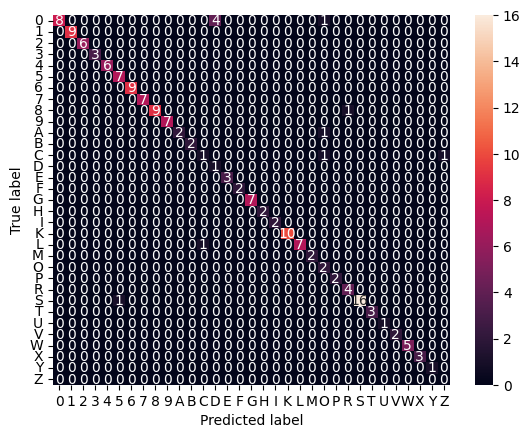

In [120]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import keras
import numpy as np
import seaborn as sn

model = keras.models.load_model("../../.weights/recognition_model.keras")

y_pred = model.predict(x_test_real)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix = confusion_matrix(y_test_real, y_pred)

labels = [CLASSES[x] for x in sorted(np.unique(np.concatenate((y_test_real, y_pred))).tolist())]


heatmap = sn.heatmap(confusion_matrix, annot=True, xticklabels=labels, yticklabels=labels)
heatmap.set(xlabel="Predicted label", ylabel="True label")
